# Predicting chronic kidney disease from data using logistic regression classifier

## Dataset

The dataset for this problem is the CKDPD (Chronick Kidney Disease Patient Dataset) downloaded from https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease. Number of instances are 400. It is a multivariate data set, containing 24 variables that are age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc, htn, dm, cad, appet, pe and ane. All values are real integers. This data set contains 250 chronic kidney disease patient records and 150 non chronic kidney disease patient records.

## Introduction

We will go through the entire data pipeline from data cleaning, preprocessing, staging and modelling on a relatively small dataset (400 entries). We will compare different machine learning models and try to measure their performance using various metrics.

Summary
* It is a classification problem
* Features include numerical values and categorical values
* There are missing values within features and need to impute missing numerical and categorical values
* Categorical features need to be converted to numerical using the encoding methods
* Find the correlation between the features
* Find the distribution of numerical features and normalise if required
* Model the prediction with logistic regression classifier
* Display the coefficients and form the logistic regression equation.
* Evaluate the model using cross validation methods(k-fold)
* Draw the decision boundary
* Visualise the test results

## Load the libraries

In [1]:
# #%%md
# ## Install libraries if not already installed
# #%%
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn_pandas
# !pip install xgboost
# !pip install Ipython
# !pip install scipy

In [2]:
# We will need following libraries to start with and shall load the libraries required as we go along
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import display
from scipy.stats import mode
from sklearn.model_selection import cross_val_score

In [3]:
# We have seen and considered the warnings. To improve readability of the results, let us ignore the warnings. 
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

Load the data from the spreadhseet provided to a pandas dataframe

In [4]:
# Loading the kidney_disease dataset
df = pd.read_csv("kidney_disease.csv")
Y = df['class']
X = df.drop(['class'],axis=1)
df_headings = df.columns.tolist()

In [5]:
X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [6]:
X.shape # rows, columns of original dataset

(400, 24)

In [7]:
X.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,11.3,38,6000,?,no,no,no,good,no,no
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,9.6,31,7500,?,no,yes,no,poor,no,yes
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,11.6,35,7300,4.6,no,no,no,good,no,no
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,12.2,39,7800,4.4,yes,yes,no,good,yes,no
6,68,70,1.01,0,0,?,normal,notpresent,notpresent,100,...,12.4,36,?,?,no,no,no,good,no,no
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,12.4,44,6900,5,no,yes,no,good,yes,no
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,10.8,33,9600,4,yes,yes,no,good,no,yes
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,...,9.5,29,12100,3.7,yes,yes,no,poor,no,yes


Missing values are depicted with '?'

Features:
* age		-	age	
* bp		-	blood pressure
* sg		-	specific gravity
* al		-   albumin
* su		-	sugar
* rbc		-	red blood cells
* pc		-	pus cell
* pcc		-	pus cell clumps
* ba		-	bacteria
* bgr		-	blood glucose random
* bu		-	blood urea
* sc		-	serum creatinine
* sod		-	sodium
* pot		-	potassium
* hemo	    -	hemoglobin
* pcv		-	packed cell volume
* wc		-	white blood cell count
* rc		-	red blood cell count
* htn		-	hypertension
* dm		-	diabetes mellitus
* cad		-	coronary artery disease
* appet	    -	appetite
* pe		-	pedal edema
* ane		-	anemia
* class	    -	class	

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

All columns have dtype object irrespective of numerical or categorical values.
There are missing values represented by '?'.

In [9]:
X.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,116,45,93,47,3,6,4,3,3,3
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,?,no,no,no,good,no,no
freq,19,116,106,199,290,201,259,354,374,44,...,52,70,105,130,251,258,362,317,323,339


## Data Preprocessing

### 1. Trimming the whitespaces in the data

In [10]:
for column in X.columns:
    X[column] = X[column].astype(str).str.strip()   # trim the string of white spaces

### 2. Removing duplicates
Duplicates rows can be present in data due to various reasons. The question about whether duplicates should be removed or not depends on the particular problem setting and context. For example - In linear regression, if you have duplicate rows, then the underlying assumption about standard error terms being uncorrelated will be violated, which will lead our model to underestimate the actual standard errors. Thus, duplicates must be removed in that case.

In our case, removing duplicates makes sense, as most likely it is possible that someone entered the data for a patient multiple times.

In [11]:
X = X[~df.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
X.shape

(400, 24)

In [12]:
X_duplicate = X[X.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
X_duplicate

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane


There are no duplictes

### 3. Applying the appropriate data type to the features
Currently all attributes are of type object. Convert numerical attirbutes to numerical data type and categorical/nominal to category datatye

In [13]:
numerical_cols = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']   # given in the dataset information
X[numerical_cols] = X[numerical_cols].apply(pd.to_numeric, errors='coerce')
X_numerical_features = X[numerical_cols].copy() 

categorical_cols = ['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'] # given
X[X.select_dtypes(['object']).columns] = X.select_dtypes(['object']).apply(lambda x: x.astype('category'))

X_categorical_features =X[['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']].copy()
X_categorical_features = X[categorical_cols].copy() 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 24 columns):
age      391 non-null float64
bp       388 non-null float64
sg       400 non-null category
al       400 non-null category
su       400 non-null category
rbc      400 non-null category
pc       400 non-null category
pcc      400 non-null category
ba       400 non-null category
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      400 non-null category
dm       400 non-null category
cad      400 non-null category
appet    400 non-null category
pe       400 non-null category
ane      400 non-null category
dtypes: category(13), float64(11)
memory usage: 44.5 KB


### 4. Handling missing values
1. Replace ? with NaN
2. Fill the null values in the numerical features with median value
3. Fill the null values in the categorical features with mode (most frequently occuring value)

In [14]:
# Check missing values
X.isna().sum(axis=0)

age        9
bp        12
sg         0
al         0
su         0
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
dtype: int64

In [15]:
# Replace ? with NaN
X.replace('?', np.NaN, regex=False,inplace=True)
X.replace('', np.NaN, regex=False,inplace=True)
X.replace(r'\s+',np.NaN,regex=True).replace('',np.NaN)
# X.to_csv("X_afterqreplaced.csv", sep=',', index=False)
#print(X_features.isnull().sum())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.02,1,0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.01,2,3,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.01,2,0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
5,60.0,90.0,1.015,3,0,NaN,NaN,notpresent,notpresent,74.0,...,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no
6,68.0,70.0,1.01,0,0,NaN,normal,notpresent,notpresent,100.0,...,12.4,36.0,NaN,NaN,no,no,no,good,no,no
7,24.0,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410.0,...,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no
8,52.0,100.0,1.015,3,0,normal,abnormal,present,notpresent,138.0,...,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes
9,53.0,90.0,1.02,2,0,abnormal,abnormal,present,notpresent,70.0,...,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes


In [16]:
# Define a function to display the missing value % against the feature
def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_columns = mis_val_table_columns[
        mis_val_table_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits
    
    # Print some summary information
    print("Dataset has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_columns.shape[0]))
    
    # Return the dataframe with missing information
    return mis_val_table_columns

In [17]:
missing_values_table(X)

Dataset has 24 columns.
There are 24 columns that have missing values.


,Missing Values,% of Total Values
rbc,152,38.00
rbcc,131,32.75
wbcc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


In [18]:
# We loop through the features and fill in the missing values based on the data type as below
    # median for numerical attirbutes
    # mode for categorical attributes
for column in X.columns:
    if X[column].dtype == np.float64:
        X[column] = X[column].fillna(X[column].median())
    else:
        X[column] = X[column].fillna(X[column].mode()[0])        
# X.to_csv("X_missingvalueshandled.csv", sep=',', index=False)
X.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

### 5. Finding the correlation between the features
We shall find the correlation between the features and plot them as heatmap. 
Diagonals will have the correlation value of 1, as the feature is correlated with itself. 
Any other element close to 1 will mean the two features are correlated. 

In [19]:
# import seaborn as sns
# SMALL_SIZE = 15
# MEDIUM_SIZE = 22
# BIGGER_SIZE = 27

# plt.figure(figsize=(40,20))
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# sns.heatmap(df.corr(), annot=True)
# plt.show()

In [20]:
rs = np.random.RandomState(0)
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1,0.136316,0.230731,0.194291,0.133985,-0.0860401,0.0493991,-0.178308,-0.212796,0.0937945,-0.203199
bp,0.136316,1,0.15018,0.180841,0.143184,-0.100705,0.0636671,-0.279303,-0.289237,0.0221768,-0.219317
bgr,0.230731,0.15018,1,0.118859,0.0688864,-0.130569,0.0527317,-0.254435,-0.2582,0.119881,-0.214094
bu,0.194291,0.180841,0.118859,1,0.581517,-0.308806,0.339771,-0.541635,-0.523091,0.0383623,-0.465243
sc,0.133985,0.143184,0.0688864,0.581517,1,-0.624036,0.204751,-0.342492,-0.338611,-0.0103334,-0.321737
sod,-0.0860401,-0.100705,-0.130569,-0.308806,-0.624036,1,0.0696122,0.331483,0.343555,0.00800996,0.313929
pot,0.0493991,0.0636671,0.0527317,0.339771,0.204751,0.0696122,1,-0.0964281,-0.117795,-0.0755627,-0.118226
hemo,-0.178308,-0.279303,-0.254435,-0.541635,-0.342492,0.331483,-0.0964281,1,0.84749,-0.137978,0.667512
pcv,-0.212796,-0.289237,-0.2582,-0.523091,-0.338611,0.343555,-0.117795,0.84749,1,-0.175226,0.693473
wbcc,0.0937945,0.0221768,0.119881,0.0383623,-0.0103334,0.00800996,-0.0755627,-0.137978,-0.175226,1,-0.153776


From the heatmap we could see that hemo and pcv are strongly correlated(0.9), hemo and rbcc are correlated(0.8), pcv and rbcc are correlated(0.69). This means that hemo is an important feature.
Note: We are not removing the features in the study. 

### 6. Encoding categorical values with numerals


#### Dealing with categorical features
One-hot encoding is a popular method that can be used when the different values of features do not have any inherent ordering.
If we know of some ordering (such as a feature which has possible values 'Small', 'Medium', 'Large'), then using the method LabelEncoder can make more sense.
Here we use pd.get_dummies() method to one-hot encode the features.

In [21]:
for column in X.columns:
    if X[column].dtype != np.float64:
        X[column] = X[column].astype(str).str.strip()   # trim the string of white spaces        
        X_ohe = pd.get_dummies(X[column], prefix=column)
        X = X.drop(column, axis=1)   # we do not need the original column
        X = pd.concat([X, X_ohe], axis=1) # add the encoded columns to the dataset       
# X.to_csv("X_imputed.csv", sep=',', index=False)
X.head(10)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,48.0,80.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,...,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,...,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,...,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,...,1,0,1,0,1,0,1,0,1,0
5,60.0,90.0,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,...,0,1,1,0,1,0,0,1,1,0
6,68.0,70.0,100.0,54.0,24.0,104.0,4.0,12.4,36.0,8000.0,...,1,0,1,0,1,0,1,0,1,0
7,24.0,80.0,410.0,31.0,1.1,138.0,4.4,12.4,44.0,6900.0,...,0,1,1,0,1,0,0,1,1,0
8,52.0,100.0,138.0,60.0,1.9,138.0,4.4,10.8,33.0,9600.0,...,0,1,1,0,1,0,1,0,0,1
9,53.0,90.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,...,0,1,1,0,0,1,1,0,0,1


In [22]:
list(X.columns.values)

['age',
 'bp',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'sg_1.005',
 'sg_1.01',
 'sg_1.015',
 'sg_1.02',
 'sg_1.025',
 'al_0',
 'al_1',
 'al_2',
 'al_3',
 'al_4',
 'al_5',
 'su_0',
 'su_1',
 'su_2',
 'su_3',
 'su_4',
 'su_5',
 'rbc_abnormal',
 'rbc_normal',
 'pc_abnormal',
 'pc_normal',
 'pcc_notpresent',
 'pcc_present',
 'ba_notpresent',
 'ba_present',
 'htn_no',
 'htn_yes',
 'dm_no',
 'dm_yes',
 'cad_no',
 'cad_yes',
 'appet_good',
 'appet_poor',
 'pe_no',
 'pe_yes',
 'ane_no',
 'ane_yes']

In [23]:
lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(Y)
# Y

### 7. Visualise the dataset
1. Draw the boxplot for the numerical features
2. Display the histogram/distribution of the numerical features

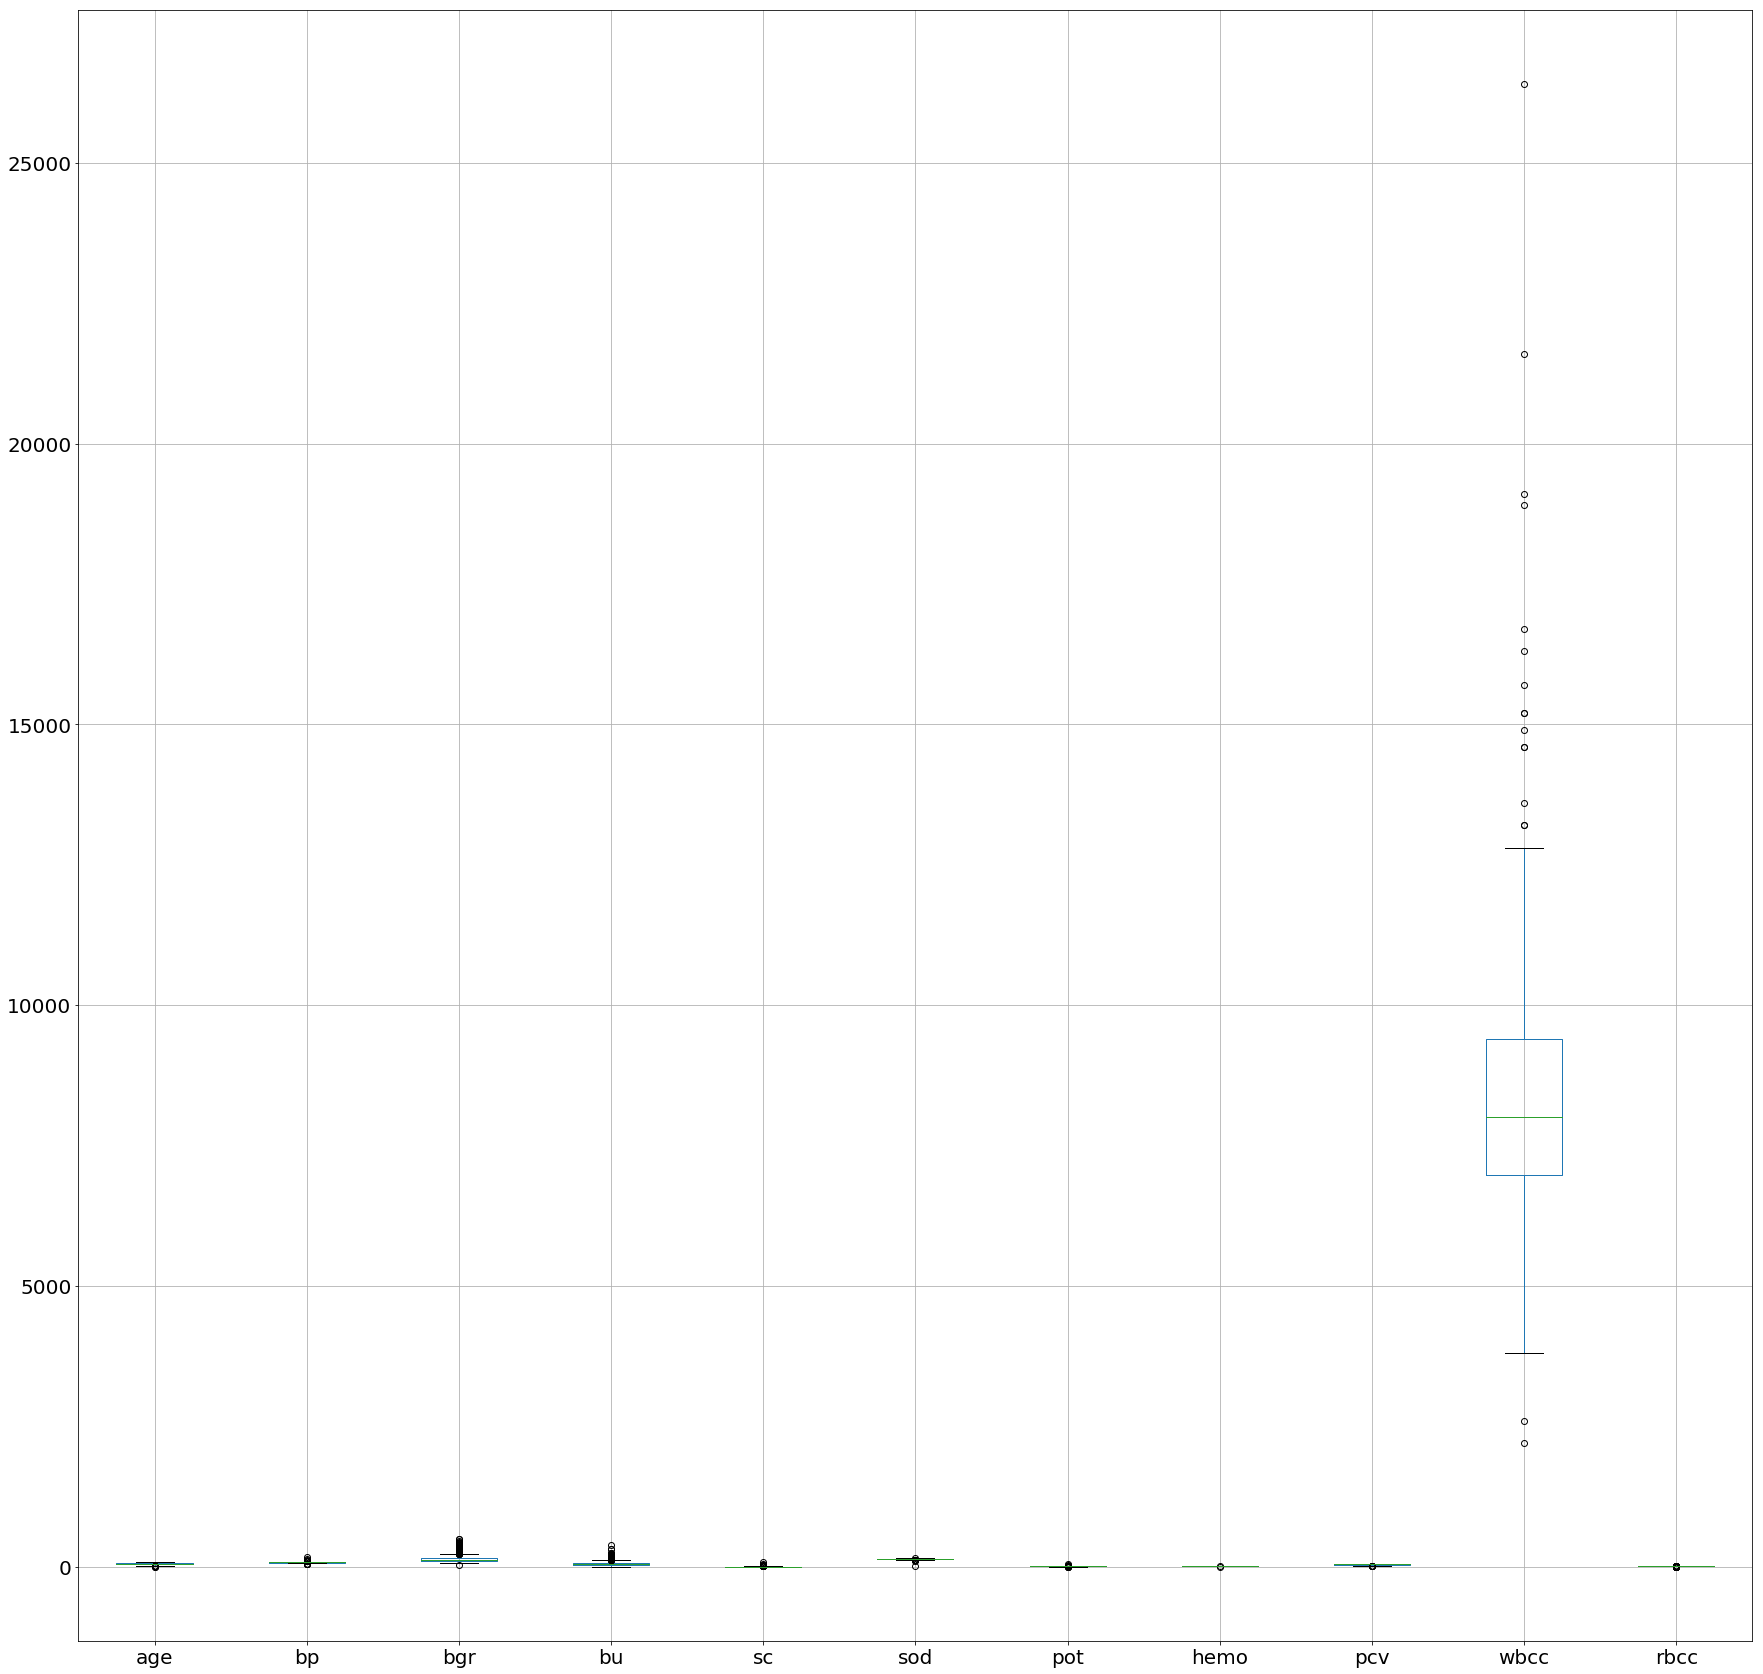

In [24]:
boxplot = X.boxplot(column=['age', 'bp', 'bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'], fontsize = 20, figsize=(30,30))

Above boxplot shows that the features are not normalised

### Log transform certain features

We need to check if any features have skewed distribution and apply a log transformation on those features. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1D88F79B0>,
      dtype=object)

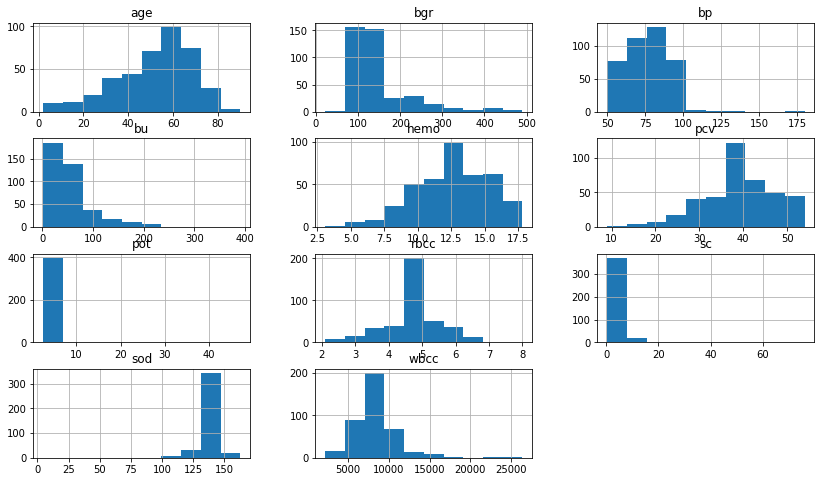

In [25]:
# Visualize skewed continuous features of original data
X[numerical_cols].hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1D7CAC940>,
      dtype=object)

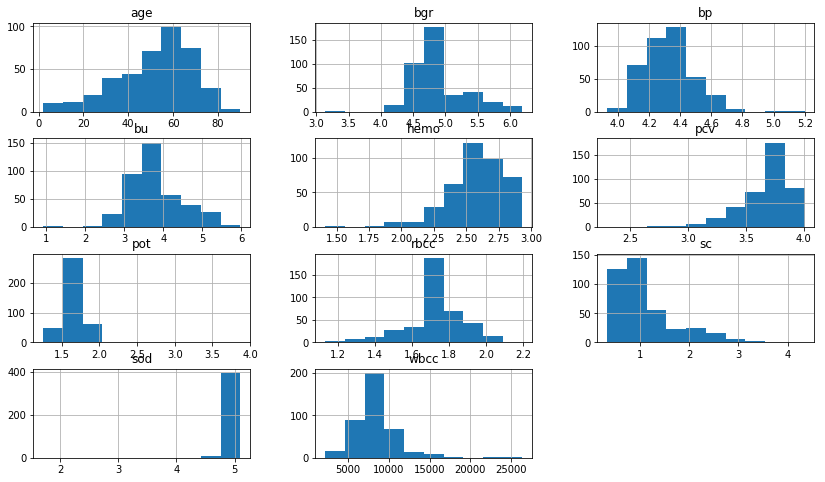

In [26]:
skewed = ['bp', 'bgr','bu','sc','sod','pot','hemo','pcv','rbcc']
X[skewed] = X[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
X[numerical_cols].hist(figsize=(14,8))

### 8. Scaling of features

Standardization (subtracting mean and scaling variance) is required for many methods like regularized linear regression, K-NearestNeighbors. One can use following scaling methods - 

1. MinMaxScaler - It preserves zero entries if the feature matrix is sparse, and is also robust to small values of S.D. for features.

2. StandardScaler - Center around zero, change variance to 1.

3. RobustScaler - Useful if there are a lot of outliers in data, this method uses percentiles to center and scale data.

Normalizing, on the other hand, causes one row of the input (one sample) to have unit norm. This is useful for Gram matrix entries in kernel methods.


We use StandardScaler. 

ToDo: Repeat with MinMaxScaler

In [27]:
X_columns = list(X.columns.values)

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data)
X = pd.DataFrame(X.values, columns = X_columns)
# X.to_csv("X_scaled.csv", sep=',', index=False)

## Modelling


### 1. Prepare the training data and test data

In [28]:
# Import train_test_split
from sklearn.model_selection import train_test_split, ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
# X_train.to_csv("training_data.csv", sep=',', index=False)
# X_test.to_csv("test_data.csv", sep=',', index=False)

Training set has 320 samples.
Testing set has 80 samples.


### 2. Baseline Predictor

Before applying any supervised learning technique, we will implement a naïve predictor, that will simply return that every data point has ‘Disease’= True. We will check our metrics(accuracy, TPR, FPR) on that predictor.

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#naive accuracy, assuming that we predict everyone has disease
positive_disease= (Y == 1)
positive_disease.astype(int) # convert boolean array to float
report = classification_report(positive_disease, Y)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       250
        True       1.00      1.00      1.00       150

   micro avg       1.00      1.00      1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



### 3. Cross validation with XGBoost and Feature importance

In [30]:
# XGB
import xgboost as xgb

# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [31]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X, Y, scoring='roc_auc', cv=3)

In [32]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9970386307133295


In [33]:
# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

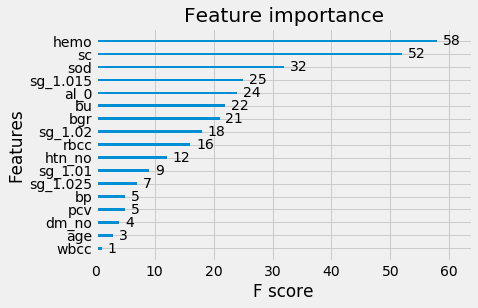

In [34]:
# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(xgb_cl)

### 4. Build the model

#### 4.1 Train and predict using the logistic regression classifier

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score

#learner = LogisticRegression(random_state=7, C=0.01, solver='liblinear')
learner = LogisticRegression(random_state=7)
learner.fit(X_train, y_train)
predictions_test = learner.predict(X_test)# predictions on test set
predictions_train = learner.predict(X_train)# predictions on first 200 elements of training set

#### 4.2 Display the co-efficients of the attributes used in the logistic function

Following is the logit function  
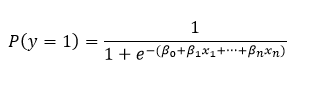
where Bo is the intercept and B1, B2, .. are co-efficients and x1, x2, ... are features
Let us display the co-efficients for the logit function generated by this learner

In [36]:
coeff = learner.coef_[0]
# Make a table with the coefficients
coeff_table = pd.DataFrame(zip(X.columns, np.transpose(learner.coef_)))

# Rename the columns
coeff_table = coeff_table.rename(columns = {0 : 'Variable', 1 : 'Coefficient'})

# Sort the table by percentage of missing descending
# .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
coeff_table = coeff_table[
coeff_table.iloc[:,1] != 0].sort_values(
    'Coefficient', ascending=False).round(2)  # round(2), keep 2 digits

coeff_table

,Variable,Coefficient
7,hemo,[1.5543119614188334]
15,sg_1.025,[1.1104565981269967]
8,pcv,[0.911883994807915]
10,rbcc,[0.7789977032844766]
38,dm_no,[0.5698337240612626]
16,al_0,[0.5040142701161129]
0,age,[0.5020130173787556]
14,sg_1.02,[0.4113582724958653]
6,pot,[0.3417162473565219]
44,pe_no,[0.3153265552306433]


#### 4.3 Display the probabilities of each attribute as derived by the classifier

In [37]:
predicted_prob = learner.predict_proba(X_test)
predicted_prob

array([[2.51004116e-02, 9.74899588e-01],
       [8.97560460e-01, 1.02439540e-01],
       [9.79894902e-01, 2.01050975e-02],
       [9.99986775e-01, 1.32254041e-05],
       [1.52862946e-03, 9.98471371e-01],
       [9.99787320e-01, 2.12680413e-04],
       [2.14585091e-02, 9.78541491e-01],
       [9.99993295e-01, 6.70458525e-06],
       [3.44105396e-02, 9.65589460e-01],
       [9.99040186e-01, 9.59814213e-04],
       [9.99999161e-01, 8.38691807e-07],
       [1.28886909e-01, 8.71113091e-01],
       [7.42704756e-01, 2.57295244e-01],
       [1.21735414e-02, 9.87826459e-01],
       [9.43520556e-01, 5.64794442e-02],
       [3.62739056e-03, 9.96372609e-01],
       [9.98322503e-01, 1.67749684e-03],
       [9.45361641e-01, 5.46383593e-02],
       [7.26443127e-03, 9.92735569e-01],
       [2.26403657e-03, 9.97735963e-01],
       [9.97082747e-01, 2.91725316e-03],
       [9.60840387e-01, 3.91596128e-02],
       [3.10448641e-02, 9.68955136e-01],
       [2.79669954e-03, 9.97203300e-01],
       [9.644232

#### 4.4 Accuracy of the model

In [38]:
print(learner.score(X_test,y_test))

0.975


#### 4.5 Display the confusion matrix

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  0]
 [ 2 48]]


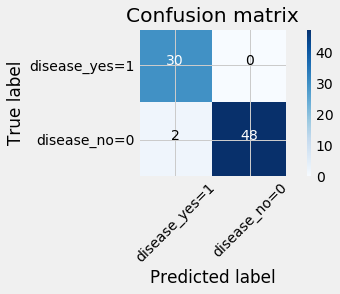

In [40]:
cnf_matrix = confusion_matrix(y_test, predictions_test, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['disease_yes=1','disease_no=0'],normalize= False,  title='Confusion matrix')

#### 4.6 Display the classification report

In [41]:
print (classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

   micro avg       0.97      0.97      0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



#### 4.7. Evaluation of the trained model using the K Repeated Fold Cross validation method:
Here we set the number of folds to 5 and the repeats to 10. 
We shall use Repeated K fold CV method
We split the sample dataset into 10 folds and repeat that 10 times each, ie. executes 50 times for each of the classifiers.  

In [42]:
from sklearn.model_selection import RepeatedKFold
import math

results = {}
errors = list()
fold=0
X_train = {}
    
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,Y):
    fold = fold + 1
    X_train = X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = Y[train_index]
    y_test =  Y[test_index]

    #     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
    learner.fit(X_train, y_train)
    y_train_preds = learner.predict(X_train)
    y_test_preds = learner.predict(X_test)
    errors.append(accuracy_score(y_test_preds, y_test))

#     Compute statistics
mean = sum(errors)/fold
variance = sum([(error - mean)**2 for error in errors])/(fold)
standardDeviation = variance**.5
confiidenceInterval = (mean - 1.96*standardDeviation, mean + 1.96*standardDeviation)

      
results['Cross Validation_Mean'] = mean
results['Cross Validation_Variance'] = variance
results['Cross Validation_StandardDeviation'] = standardDeviation

print ("Accuracy Score Mean = {}".format(mean))
print ("Accuracy Score Variance = {}".format(variance))
print ("Accuracy Score Std.Dev = {}".format(standardDeviation))
print ("Accuracy Score Confidence Interval = {}".format(confiidenceInterval))      

Accuracy Score Mean = 0.9797499999999998
Accuracy Score Variance = 0.0005211875000000002
Accuracy Score Std.Dev = 0.022829531313629726
Accuracy Score Confidence Interval = (0.9350041186252855, 1.024495881374714)


In [43]:
cross_val = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print(cross_val.mean())

0.9724999999999999


### 5. Visalise decision boundary, training set results and test set results

(-6.282430202824677, 2.5775697971751343)

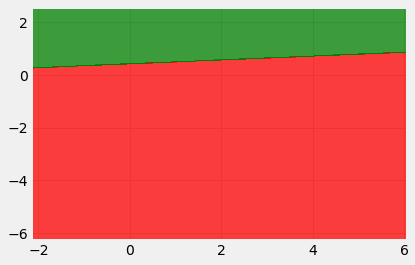

In [44]:
#visualizing decision boundary
# We will take two features with significant co-efficient that influences the model and draw the boundary between them
# Those features are hemo and sg

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
decision_features_train =X_train[['age','hemo']].copy()
learner_db = LogisticRegression(random_state=7)
learner_db.fit((decision_features_train), y_train)
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 4].min() - 1, stop = X_set.iloc[:, 4].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 7].min() - 1, stop = X_set.iloc[:, 7].max() + 1, step = 0.01))
plt.contourf(X1, X2, learner_db.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


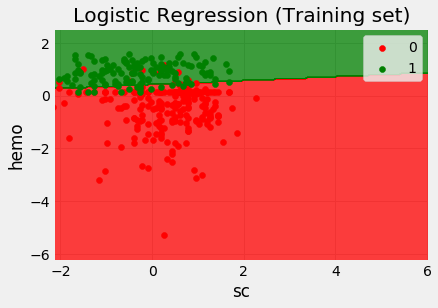

In [45]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

# X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 4].min() - 1, stop = X_set.iloc[:, 4].max() + 1, step = 0.05),
                     np.arange(start = X_set.iloc[:, 7].min() - 1, stop = X_set.iloc[:, 7].max() + 1, step = 0.05))
plt.contourf(X1, X2, learner_db.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
decision_features_train.to_numpy()
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(decision_features_train.iloc[y_set == j, 0], decision_features_train.iloc[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('sc')
plt.ylabel('hemo')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


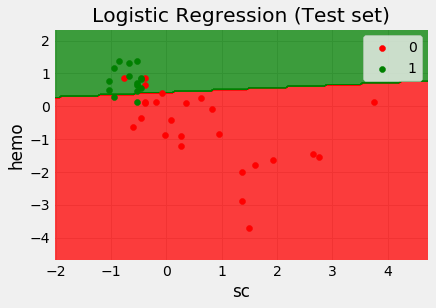

In [46]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
decision_features_test =X_test[['sc','hemo']].copy()
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 4].min() - 1, stop = X_set.iloc[:, 4].max() + 1, step = 0.05),
                     np.arange(start = X_set.iloc[:, 7].min() - 1, stop = X_set.iloc[:, 7].max() + 1, step = 0.05))
plt.contourf(X1, X2, learner_db.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
decision_features_test.to_numpy()
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(decision_features_test.iloc[y_set == j, 0], decision_features_test.iloc[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('sc')
plt.ylabel('hemo')
plt.legend()
plt.show()

### 6. ROC Curve

An additional metric called as Receiver Operator Characteristics(ROC) curve will be used. It plots the curve of True Positive Rate vs the False positive Rate, with a greater area under the curve indicating a better True Positive Rate for the same False Positive Rate. This can be helpful in this case as simply knowing the number of correct predictions may not suffice.
  



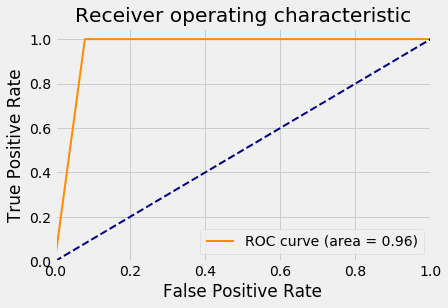

For classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), ROC score is 0.960000


In [47]:
#plotting ROC curve
from sklearn import metrics

pred=learner.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print ("For classifier %s, ROC score is %f"%(learner,roc_auc))
#fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)